# UBS Hackathon Thursday - TeamG
## Tidying Data Deep Dive

done

## Problem Development

### Decide on a problem space

We are going to try and identify any branches that are inefficient i.e. there are not that many deposits in the past few years compared with other branches in the area. Then providing, there are sufficient branches in the city/state that can pick up the activity of said inefficient branch, we can then make a decision as to whether we can close said branch or not.

### Possible outputs

 - Visualise performance of branch compared to city and branch: input = branch name, output = graph showing branch performance compared to city and state
 - Based on distance input, help management make a decision as to whether they could close said branch: input = branch name & distance from closest alternative branch, output = decision as to whether can justify shutting down branch
 
 

### Objectives

- create chart showing graph of branch performance vs city and state
- identify underperforming branches in the city/state based on best performing branch results for city/state
- create chart showing branches in city and state and the distance between them


### Success criteria

- allow user to identify underperforming branches based on city/state
- allow user to input branch name and display graph per objective
- allow user to input distance threshold and display whether a branch can be closed or not

### Import the data and libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

### Read the data

In [2]:
df = pd.read_csv('bankdepos.csv')

In [3]:
df.head(10)

,Institution Name,Main Office,Branch Name,Branch Number,Established Date,Acquired Date,Street Address,City,County,State,Zipcode,Latitude,Longitude,2010 Deposits,2011 Deposits,2012 Deposits,2013 Deposits,2014 Deposits,2015 Deposits,2016 Deposits
0,JPMorgan Chase Bank,1,JPMorgan Chase Bank Main Office,0,01/01/1824,NaN,1111 Polaris Parkway,Columbus,Delaware,OH,43240,40.14453,-82.99115,633131000.0,743268000.0,832455000.0,916543000.0,1.032549e+09,1.069425e+09,1155185000
1,JPMorgan Chase Bank,0,Vernon Hills Scarsdale Branch,2,03/20/1961,NaN,676 White Plains Road,Scarsdale,Westchester,NY,10583,40.97008,-73.80670,293229.0,310791.0,325742.0,327930.0,3.277920e+05,3.414750e+05,381558
2,JPMorgan Chase Bank,0,Great Neck Northern Boulevard Branch,3,09/09/1963,NaN,410 Northern Boulevard,Great Neck,Nassau,NY,11021,40.77944,-73.72240,191011.0,206933.0,216439.0,237983.0,2.341830e+05,2.624550e+05,278940
3,JPMorgan Chase Bank,0,North Hartsdale Branch,4,02/19/1966,NaN,353 North Central Avenue,Hartsdale,Westchester,NY,10530,41.02654,-73.79168,87110.0,88367.0,93163.0,109659.0,1.119850e+05,1.167720e+05,140233
4,JPMorgan Chase Bank,0,Lawrence Rockaway Branch,5,01/16/1965,NaN,335 Rockaway Turnpike,Lawrence,Nassau,NY,11559,40.62715,-73.73675,172608.0,172749.0,189413.0,198445.0,2.051980e+05,2.232000e+05,235594
5,JPMorgan Chase Bank,0,Mount Vernon Branch,9,02/25/1964,NaN,22 West First Street,Mount Vernon,Westchester,NY,10550,40.91144,-73.83804,146820.0,136672.0,140678.0,154313.0,1.487070e+05,1.454990e+05,151949
6,JPMorgan Chase Bank,0,Castle Hill Branch,12,12/11/1965,NaN,784 Castle Hill Avenue,Bronx,Bronx,NY,10473,40.82292,-73.84887,75131.0,80172.0,82333.0,94538.0,9.704600e+04,1.071660e+05,110592
7,JPMorgan Chase Bank,0,Burnside Avenue Branch,15,02/14/1922,NaN,5 West Burnside Avenue,Bronx,Bronx,NY,10453,40.85389,-73.90760,39888.0,42546.0,43800.0,45867.0,5.136300e+04,5.669300e+04,62993
8,JPMorgan Chase Bank,0,Gun Hill Branch,16,12/18/1950,NaN,1308 East Gun Hill Road,Bronx,Bronx,NY,10469,40.87151,-73.84823,73702.0,70049.0,70447.0,78946.0,8.067700e+04,8.275600e+04,88954
9,JPMorgan Chase Bank,0,Kingsbridge Road Branch,18,08/18/1924,NaN,66 East Kingsbridge Road,Bronx,Bronx,NY,10468,40.86671,-73.89562,69778.0,72816.0,74729.0,75470.0,7.875900e+04,8.397800e+04,88674


### Calculating national average

In [4]:
years=('2010','2011','2012','2013','2014','2015','2016')

In [5]:
#drop Acquired Date column as have a lot of NAN there
df=df.drop(['Acquired Date'], axis=1)

In [6]:
#this will drop any rows where there will be no deposit amount since the branch was not yet open then
df=df.dropna()

In [7]:
averages=(df["2010 Deposits"].mean(),df["2011 Deposits"].mean(),df["2012 Deposits"].mean(),df["2013 Deposits"].mean(),df["2014 Deposits"].mean(),df["2015 Deposits"].mean(),df["2016 Deposits"].mean())

In [8]:
years

('2010', '2011', '2012', '2013', '2014', '2015', '2016')

In [9]:
averages

(267345.5595621378,
 314550.5022537025,
 351442.61107533803,
 386704.98905344494,
 435237.405666452,
 450231.23095084785,
 488131.7611075338)

In [10]:
averagesdepos= pd.DataFrame(
    {'Year': years,
     'National average': averages,
    })

In [11]:
averagesdepos

,Year,National average
0,2010,267345.559562
1,2011,314550.502254
2,2012,351442.611075
3,2013,386704.989053
4,2014,435237.405666
5,2015,450231.230951
6,2016,488131.761108


### Sense check national average trend

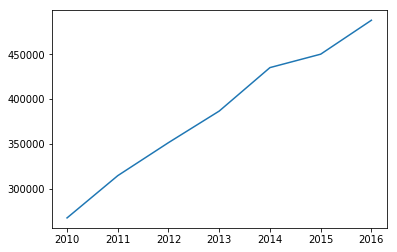

In [12]:
plt.plot(years, averages)
plt.show()

### create new dataframe, transposing the deposit data by branch





In [13]:
melted_df = df.filter(['Branch Name','2010 Deposits','2011 Deposits','2012 Deposits','2013 Deposits','2014 Deposits','2015 Deposits','2016 Deposits'], axis=1)
melted_df.head()

,Branch Name,2010 Deposits,2011 Deposits,2012 Deposits,2013 Deposits,2014 Deposits,2015 Deposits,2016 Deposits
0,JPMorgan Chase Bank Main Office,633131000.0,743268000.0,832455000.0,916543000.0,1.032549e+09,1.069425e+09,1155185000
1,Vernon Hills Scarsdale Branch,293229.0,310791.0,325742.0,327930.0,3.277920e+05,3.414750e+05,381558
2,Great Neck Northern Boulevard Branch,191011.0,206933.0,216439.0,237983.0,2.341830e+05,2.624550e+05,278940
3,North Hartsdale Branch,87110.0,88367.0,93163.0,109659.0,1.119850e+05,1.167720e+05,140233
4,Lawrence Rockaway Branch,172608.0,172749.0,189413.0,198445.0,2.051980e+05,2.232000e+05,235594


In [14]:
# Melting
id_vars = ["Branch Name"]
branchdata = pd.melt(frame=melted_df,id_vars=id_vars, var_name="Year", value_name="Deposits")
branchdata.head()

,Branch Name,Year,Deposits
0,JPMorgan Chase Bank Main Office,2010 Deposits,633131000.0
1,Vernon Hills Scarsdale Branch,2010 Deposits,293229.0
2,Great Neck Northern Boulevard Branch,2010 Deposits,191011.0
3,North Hartsdale Branch,2010 Deposits,87110.0
4,Lawrence Rockaway Branch,2010 Deposits,172608.0


In [15]:
# Formatting 
branchdata["Year"] = branchdata['Year'].str.extract('(\d+)', expand=False).astype(int)
branchdata.head()

,Branch Name,Year,Deposits
0,JPMorgan Chase Bank Main Office,2010,633131000.0
1,Vernon Hills Scarsdale Branch,2010,293229.0
2,Great Neck Northern Boulevard Branch,2010,191011.0
3,North Hartsdale Branch,2010,87110.0
4,Lawrence Rockaway Branch,2010,172608.0


In [16]:
#add city, country and state to the data
branchage = df.filter(['Branch Name','Established Date','City','County','State'], axis=1)
branchage.head()
#cal

,Branch Name,Established Date,City,County,State
0,JPMorgan Chase Bank Main Office,01/01/1824,Columbus,Delaware,OH
1,Vernon Hills Scarsdale Branch,03/20/1961,Scarsdale,Westchester,NY
2,Great Neck Northern Boulevard Branch,09/09/1963,Great Neck,Nassau,NY
3,North Hartsdale Branch,02/19/1966,Hartsdale,Westchester,NY
4,Lawrence Rockaway Branch,01/16/1965,Lawrence,Nassau,NY


In [17]:
#calculate length of time the branch has been open for
ye2016 = datetime.datetime(2016, 12, 31)


In [18]:
ye2016

datetime.datetime(2016, 12, 31, 0, 0)

In [19]:
branchage['yearsopen']=(np.floor((pd.to_datetime(ye2016)-pd.to_datetime(branchage['Established Date'])).dt.days/365.25)).astype(int)

In [20]:
branchage

,Branch Name,Established Date,City,County,State,yearsopen
0,JPMorgan Chase Bank Main Office,01/01/1824,Columbus,Delaware,OH,192
1,Vernon Hills Scarsdale Branch,03/20/1961,Scarsdale,Westchester,NY,55
2,Great Neck Northern Boulevard Branch,09/09/1963,Great Neck,Nassau,NY,53
3,North Hartsdale Branch,02/19/1966,Hartsdale,Westchester,NY,50
4,Lawrence Rockaway Branch,01/16/1965,Lawrence,Nassau,NY,51
5,Mount Vernon Branch,02/25/1964,Mount Vernon,Westchester,NY,52
6,Castle Hill Branch,12/11/1965,Bronx,Bronx,NY,51
7,Burnside Avenue Branch,02/14/1922,Bronx,Bronx,NY,94
8,Gun Hill Branch,12/18/1950,Bronx,Bronx,NY,66
9,Kingsbridge Road Branch,08/18/1924,Bronx,Bronx,NY,92


In [21]:
#merge on Branch name to show how long each branch has been open for and its deposit amounts per year
data = pd.merge(branchage, branchdata, on='Branch Name', how='inner')

In [22]:
data.head()

,Branch Name,Established Date,City,County,State,yearsopen,Year,Deposits
0,JPMorgan Chase Bank Main Office,01/01/1824,Columbus,Delaware,OH,192,2010,6.331310e+08
1,JPMorgan Chase Bank Main Office,01/01/1824,Columbus,Delaware,OH,192,2011,7.432680e+08
2,JPMorgan Chase Bank Main Office,01/01/1824,Columbus,Delaware,OH,192,2012,8.324550e+08
3,JPMorgan Chase Bank Main Office,01/01/1824,Columbus,Delaware,OH,192,2013,9.165430e+08
4,JPMorgan Chase Bank Main Office,01/01/1824,Columbus,Delaware,OH,192,2014,1.032549e+09


In [23]:
#convert years from object into integer
averagesdepos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 2 columns):
Year                7 non-null object
National average    7 non-null float64
dtypes: float64(1), object(1)
memory usage: 192.0+ bytes


In [24]:
averagesdepos

,Year,National average
0,2010,267345.559562
1,2011,314550.502254
2,2012,351442.611075
3,2013,386704.989053
4,2014,435237.405666
5,2015,450231.230951
6,2016,488131.761108


In [25]:
averagesdepos['Year']= averagesdepos['Year'].astype(str).astype(int)

In [26]:
averagesdepos

,Year,National average
0,2010,267345.559562
1,2011,314550.502254
2,2012,351442.611075
3,2013,386704.989053
4,2014,435237.405666
5,2015,450231.230951
6,2016,488131.761108


In [27]:
averagesdepos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 2 columns):
Year                7 non-null int32
National average    7 non-null float64
dtypes: float64(1), int32(1)
memory usage: 164.0 bytes


In [28]:
#do a left merge so that can have national average in same dataframe
data_merge = pd.merge(data, averagesdepos, on='Year', how='left')

In [29]:
data_merge

,Branch Name,Established Date,City,County,State,yearsopen,Year,Deposits,National average
0,JPMorgan Chase Bank Main Office,01/01/1824,Columbus,Delaware,OH,192,2010,6.331310e+08,267345.559562
1,JPMorgan Chase Bank Main Office,01/01/1824,Columbus,Delaware,OH,192,2011,7.432680e+08,314550.502254
2,JPMorgan Chase Bank Main Office,01/01/1824,Columbus,Delaware,OH,192,2012,8.324550e+08,351442.611075
3,JPMorgan Chase Bank Main Office,01/01/1824,Columbus,Delaware,OH,192,2013,9.165430e+08,386704.989053
4,JPMorgan Chase Bank Main Office,01/01/1824,Columbus,Delaware,OH,192,2014,1.032549e+09,435237.405666
5,JPMorgan Chase Bank Main Office,01/01/1824,Columbus,Delaware,OH,192,2015,1.069425e+09,450231.230951
6,JPMorgan Chase Bank Main Office,01/01/1824,Columbus,Delaware,OH,192,2016,1.155185e+09,488131.761108
7,Vernon Hills Scarsdale Branch,03/20/1961,Scarsdale,Westchester,NY,55,2010,2.932290e+05,267345.559562
8,Vernon Hills Scarsdale Branch,03/20/1961,Scarsdale,Westchester,NY,55,2011,3.107910e+05,314550.502254
9,Vernon Hills Scarsdale Branch,03/20/1961,Scarsdale,Westchester,NY,55,2012,3.257420e+05,351442.611075


In [30]:
#filter based on branch that management is intersted in
SelectBranch= data_merge[data_merge['Branch Name'] == "Vernon Hills Scarsdale Branch"]

In [31]:
SelectBranch

,Branch Name,Established Date,City,County,State,yearsopen,Year,Deposits,National average
7,Vernon Hills Scarsdale Branch,03/20/1961,Scarsdale,Westchester,NY,55,2010,293229.0,267345.559562
8,Vernon Hills Scarsdale Branch,03/20/1961,Scarsdale,Westchester,NY,55,2011,310791.0,314550.502254
9,Vernon Hills Scarsdale Branch,03/20/1961,Scarsdale,Westchester,NY,55,2012,325742.0,351442.611075
10,Vernon Hills Scarsdale Branch,03/20/1961,Scarsdale,Westchester,NY,55,2013,327930.0,386704.989053
11,Vernon Hills Scarsdale Branch,03/20/1961,Scarsdale,Westchester,NY,55,2014,327792.0,435237.405666
12,Vernon Hills Scarsdale Branch,03/20/1961,Scarsdale,Westchester,NY,55,2015,341475.0,450231.230951
13,Vernon Hills Scarsdale Branch,03/20/1961,Scarsdale,Westchester,NY,55,2016,381558.0,488131.761108


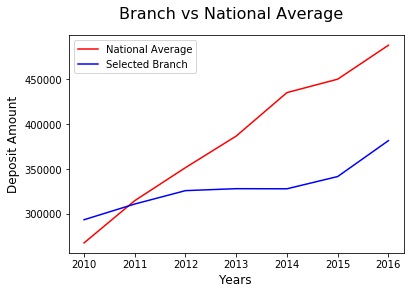

In [35]:
fig = plt.figure()
plt.plot(SelectBranch['Year'],SelectBranch['National average'],'r-',label='National Average')
plt.plot(SelectBranch['Year'],SelectBranch['Deposits'],'b-',label='Selected Branch')


fig.suptitle('Branch vs National Average', fontsize=16)
plt.xlabel('Years', fontsize=12)
plt.ylabel('Deposit Amount', fontsize=12)

plt.legend()
plt.show()
